In [7]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd

def load_data(ticker):

    filename = '../frd_complete_plus_options_sample/option_chain_' + ticker + '.csv'
    df = pd.read_csv(filename)
    df['ticker'] = ticker

    return df

ticker = 'META'
df = load_data(ticker)

In [8]:
df

,Trade Date,STrike,Expiry Date,Call/Put,Last Trade Price,Bid Price,Ask Price,Bid Implied Volatility,Ask Implied Volatility,Open Interest,Volume,Delta,Gamma,Vega,Theta,Rho,ticker
0,2023-07-03,20.0,2023-07-07,c,266.31,266.15,266.40,0.0,9.6047,0,0,1.0000,0.0000,0.0000,-0.0037,0.0023,META
1,2023-07-03,30.0,2023-07-07,c,256.31,256.15,256.40,0.0,8.0060,0,0,1.0000,0.0000,0.0000,-0.0055,0.0034,META
2,2023-07-03,40.0,2023-07-07,c,246.32,246.15,246.45,0.0,7.2633,0,0,1.0000,0.0000,0.0000,-0.0073,0.0045,META
3,2023-07-03,50.0,2023-07-07,c,236.33,235.95,236.60,0.0,7.0255,0,0,1.0000,0.0000,0.0000,-0.0091,0.0057,META
4,2023-07-03,60.0,2023-07-07,c,226.34,226.10,226.60,0.0,6.2752,0,0,1.0000,0.0000,0.0000,-0.0110,0.0068,META
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3763,2023-07-03,540.0,2025-12-19,p,253.71,251.40,255.35,0.0,0.4304,0,0,-0.9515,0.0020,1.4731,-0.0004,-1301.0644,META
3764,2023-07-03,545.0,2025-12-19,p,258.71,256.00,261.00,0.0,0.4436,0,0,-0.9481,0.0020,1.4389,-0.0009,-1311.4135,META
3765,2023-07-03,550.0,2025-12-19,p,263.71,261.00,266.00,0.0,0.4481,0,0,-0.9487,0.0020,1.4510,-0.0009,-1324.1518,META
3766,2023-07-03,555.0,2025-12-19,p,268.71,266.05,270.95,0.0,0.4519,0,0,-0.9496,0.0020,1.4631,-0.0009,-1337.0776,META


In [9]:
# # remove all rows where strike is not an integer
# df = df[df['STrike'].apply(lambda x: x.is_integer())]
# df

In [10]:
df.to_csv('int_option_chain_' + ticker + '.csv', index=False)

In [18]:
# DTE column

df["Trade Date"] = pd.to_datetime(df["Trade Date"], errors='coerce')
df["Expiry Date"] = pd.to_datetime(df["Expiry Date"], errors='coerce')
df["DTE"] = (df["Expiry Date"] - df["Trade Date"]).dt.days




datetime64[ns]
datetime64[ns]


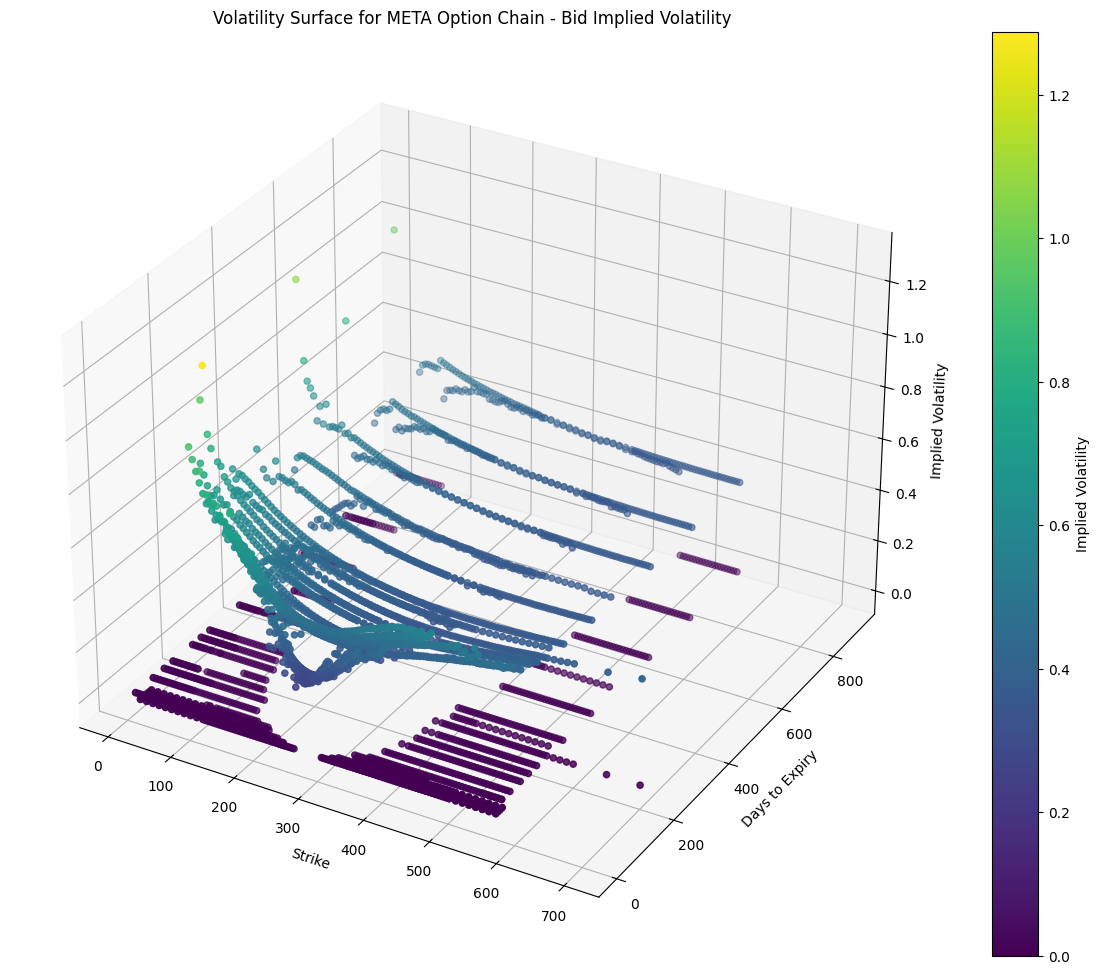

In [31]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming df is your DataFrame

fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
scatter = ax.scatter3D(df['STrike'], df['DTE'], df['Bid Implied Volatility'], c=df['Bid Implied Volatility'], cmap='viridis')
#scatter = ax.scatter3D(df['STrike'], df['DTE'], df['Bid Implied Volatility'], c=df['Bid Implied Volatility'], s=df['Volume'], cmap='viridis')

# Add labels
ax.set_xlabel('Strike')
ax.set_ylabel('Days to Expiry')
ax.set_zlabel('Implied Volatility')
ax.set_title('Volatility Surface for ' + ticker + ' Option Chain - Bid Implied Volatility')

# Add colorbar
fig.colorbar(scatter, ax=ax, label='Implied Volatility')

plt.show()

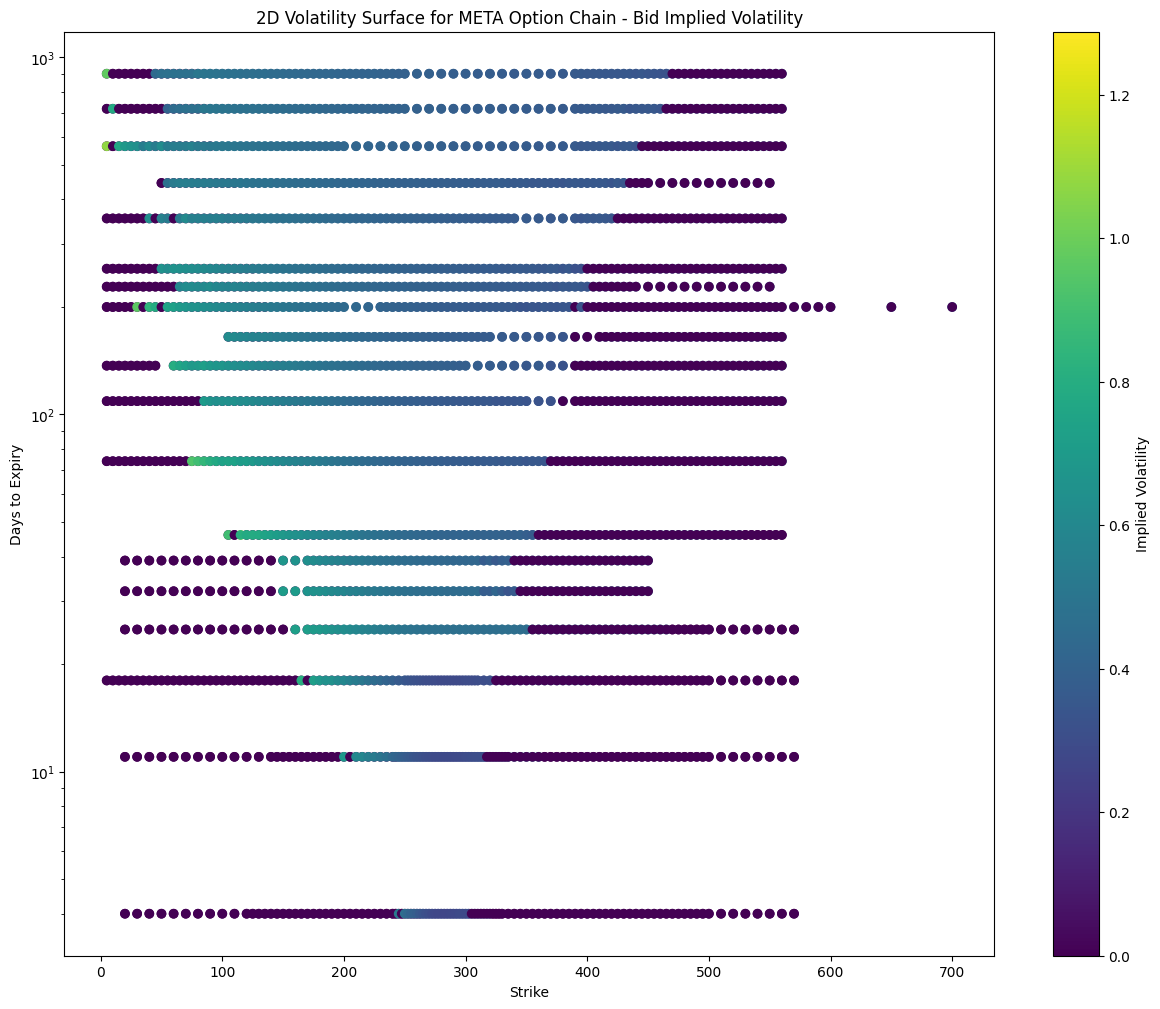

In [33]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

fig, ax = plt.subplots(figsize=(15, 12))

# Plot the scatter plot in 2D
scatter = ax.scatter(df['STrike'], df['DTE'], c=df['Bid Implied Volatility'], cmap='viridis')
#plt.yscale('log')

# Add labels
ax.set_xlabel('Strike')
ax.set_ylabel('Days to Expiry')
ax.set_title('2D Volatility Surface for ' + ticker + ' Option Chain - Bid Implied Volatility')

# Add colorbar
cbar = fig.colorbar(scatter, ax=ax, label='Implied Volatility')

plt.show()
